In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family']='serif'
import warnings
import itertools
warnings.filterwarnings('ignore')
import nltk
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

df=pd.read_csv('McDonald_s_Reviews.csv',encoding="latin-1")
df.head(5)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bingbing/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bingbing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [150]:
stop_words=stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [151]:
labels=[]
sia=SentimentIntensityAnalyzer()
for review in df['review']:
    score=sia.polarity_scores(review)['compound']
    if score>=0.05:
        labels.append(2)
    elif score<=-0.05:
        labels.append(0)
    else:
        labels.append(1)
df['label']=labels
df[['review','label']]

,review,label
0,Why does it look like someone spit on my food?...,2
1,It'd McDonalds. It is what it is as far as the...,2
2,Made a mobile order got to the speaker and che...,0
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,1
4,"I repeat my order 3 times in the drive thru, a...",0
...,...,...
33391,They treated me very badly.,0
33392,The service is very good,2
33393,To remove hunger is enough,0
33394,"It's good, but lately it has become very expen...",2


In [152]:
x=df['review']
y=df['label']
x_train,x_test,y_train,y_test=train_test_split(
    x,
    y,
    shuffle=True,
    test_size=0.2
)
model_tfidf=TfidfVectorizer(stop_words=stop_words)
x_train_num=model_tfidf.fit_transform(x_train)
x_test_num=model_tfidf.transform(x_test)
print(x_test_num.shape,x_train_num.shape)

(6680, 13006) (26716, 13006)


In [153]:
print('LogisticRegression:')
model1=LogisticRegression()
model1.fit(x_train_num,y_train)
y_train_pred1=model1.predict(x_train_num)
y_pred1 = model1.predict(x_test_num)
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred1))

LogisticRegression:
Accuracy: 0.8741017964071857
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1929
           1       0.86      0.83      0.84      1283
           2       0.92      0.91      0.92      3468

    accuracy                           0.87      6680
   macro avg       0.86      0.86      0.86      6680
weighted avg       0.88      0.87      0.87      6680



In [154]:
print('SVC:')
model2=SVC()
model2.fit(x_train_num,y_train)
y_train_pred2=model2.predict(x_train_num)
y_pred2 = model2.predict(x_test_num)
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred2))

SVC:
Accuracy: 0.874251497005988
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1929
           1       0.89      0.80      0.84      1283
           2       0.93      0.91      0.92      3468

    accuracy                           0.87      6680
   macro avg       0.87      0.86      0.86      6680
weighted avg       0.88      0.87      0.88      6680



In [155]:
print('RandomForest:')
model3=RandomForestClassifier(n_estimators=1000)
model3.fit(x_train_num,y_train)
y_train_pred3=model3.predict(x_train_num)
y_pred3 = model3.predict(x_test_num)
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred3))

print('DecisionTree:')
model4=DecisionTreeClassifier(max_depth=50)
model4.fit(x_train_num,y_train)
y_train_pred4=model4.predict(x_train_num)
y_pred4 = model4.predict(x_test_num)
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred4))


RandomForest:
Accuracy: 0.8919161676646706
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1929
           1       0.85      0.89      0.87      1283
           2       0.93      0.92      0.92      3468

    accuracy                           0.89      6680
   macro avg       0.88      0.88      0.88      6680
weighted avg       0.89      0.89      0.89      6680

DecisionTree:
Accuracy: 0.8163173652694611
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.67      0.75      1929
           1       0.63      0.93      0.75      1283
           2       0.91      0.85      0.88      3468

    accuracy                           0.82      6680
   macro avg       0.79      0.82      0.79      6680
weighted avg       0.84      0.82      0.82      6680



In [156]:
def predict_review_sentiment(review):
    review_num=model_tfidf.transform([review])
    sentiment=model1.predict(review_num)
    return sentiment[0]

review1='Why does it look like someone spit on my food?I had a normal transaction,  everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.'
predict_review_sentiment(review=review1)

2

In [157]:
review2='Made a mobile order got to the speaker and checked it in.Line was not moving so I had to leave otherwise I���������������������������d be late for work.Never got the refund in the app.I called them and they said I could only get my money back in person because it was stuck in the system.Went there in person the next day  and the manager told me she wasn�'
predict_review_sentiment(review2)

0

In [158]:
review3='My mc. Crispy chicken sandwich was ������������������������������������ customer service was quick and p'
predict_review_sentiment(review3)

2

In [159]:
#neural network
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler,Normalizer
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
import datetime
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [160]:
class McDonaldDataset(Dataset):
    def __init__(self,x,y):
        self.data=x
        self.label=y
    def __len__(self):
        return len(self.label)
    def __getitem__(self, item):
        data_value=torch.FloatTensor(self.data[item])
        label_value=torch.LongTensor([self.label[item]])
        return data_value,label_value



In [161]:
# dense to sparse
from numpy import array
from scipy.sparse import csr_matrix
# create dense matrix
A = array([[1, 0, 0, 1, 0, 0], [0, 0, 2, 0, 0, 1], [0, 0, 0, 2, 0, 0]])
print(A)
# convert to sparse matrix (CSR method)
S = csr_matrix(A)
print(S)
# reconstruct dense matrix
B = S.todense()
print(B)

[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]
  (0, 0)	1
  (0, 3)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	2
[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]


In [162]:
train_loader=DataLoader(McDonaldDataset(x_train_num.todense(),y_train.values),batch_size=512)
valid_loader=DataLoader(McDonaldDataset(x_test_num.todense(),y_test.values),batch_size=512)

for x,y in valid_loader:
    print(x.shape)
    print(y.shape)
    break

torch.Size([512, 1, 13006])
torch.Size([512, 1])


In [163]:
loss_f=nn.CrossEntropyLoss()
device='mps'
class BP(nn.Module):
    def __init__(self,input_dim=30,output_dim=2):
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(input_dim,1024),
            nn.LeakyReLU(),
            nn.Linear(1024,512),
            nn.LayerNorm(512),
            nn.LeakyReLU(),
            nn.Linear(512,256),
            nn.Dropout(0.5),
            nn.LeakyReLU(),
            nn.Linear(256,128),
             nn.Dropout(0.5),
            nn.LeakyReLU(),
            nn.Linear(128,32),

            nn.LeakyReLU(),
            nn.Linear(32,output_dim),

        )
    def forward(self,x):
        return self.model(x)
def categorical_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    top_pred = preds.argmax(1, keepdim = True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

model5=BP(input_dim=x_test_num.shape[1],output_dim=3)
model5.to(device)
optimizer=optim.Adam(model5.parameters(),lr=0.001)

from tqdm import tqdm
N_epoch=20
best_loss=np.inf
par=tqdm(range(N_epoch))

train_acc_list=[]
valid_acc_list=[]
for i in par:
    epoch_loss=0
    epoch_loss_v=0
    epoch_acc=0
    epoch_acc_v=0

    for data,label in train_loader:
        data=data.to(device)
        data=data.reshape(data.shape[0],-1)
        label=label.to(device)
        optimizer.zero_grad()
        pre=model5(data)
        loss=loss_f(pre,label.reshape(-1))
        loss.backward()
        optimizer.step()
        epoch_loss=epoch_loss+loss.item()
        epoch_acc=epoch_acc+categorical_accuracy(pre,label)

    with torch.no_grad():
        for data,label in valid_loader:
            data=data.to(device)
            data=data.reshape(data.shape[0],-1)
            label=label.to(device)
            pre=model5(data)
            loss=loss_f(pre,label.reshape(-1))
            epoch_loss_v=epoch_loss_v+loss.item()
            epoch_acc_v=epoch_acc_v+categorical_accuracy(pre,label)
    if epoch_loss_v/len(valid_loader)<best_loss:
        print('Save Model..')
        best_loss=epoch_loss_v/len(valid_loader)
        torch.save(model5.state_dict(),'NN.pth')

    # print(f'Epoch: {i+1:02} | ')
    # print(f'\tTrain Loss: {epoch_loss/len(train_loader):.3f} | Valid Loss: {epoch_loss_v/len(valid_loader):.3f}')
    # print(f'\tTrain Accuracy: {epoch_acc*100/len(train_loader):.3f}% | Valid Accuracy: {epoch_acc_v*100/len(valid_loader):.3f}%')
    train_acc_list.append(epoch_acc*100/len(train_loader))
    valid_acc_list.append(epoch_acc_v*100/len(valid_loader))
    par.set_description_str(f'Epoch: {i+1:02}')
    par.set_postfix_str(f'Train Accuracy: {epoch_acc*100/len(train_loader):.3f}% | Valid Accuracy: {epoch_acc_v*100/len(valid_loader):.3f}%')

Epoch: 01:   5%|▌         | 1/20 [00:03<00:58,  3.08s/it, Train Accuracy: 73.643% | Valid Accuracy: 86.612%]

Save Model..


Epoch: 20: 100%|██████████| 20/20 [00:59<00:00,  2.95s/it, Train Accuracy: 99.558% | Valid Accuracy: 88.388%]


In [164]:
train_acc_list=[train_acc_list[i].cpu().numpy() for i in range(len(train_acc_list))]
valid_acc_list=[valid_acc_list[i].cpu().numpy() for i in range(len(valid_acc_list))]

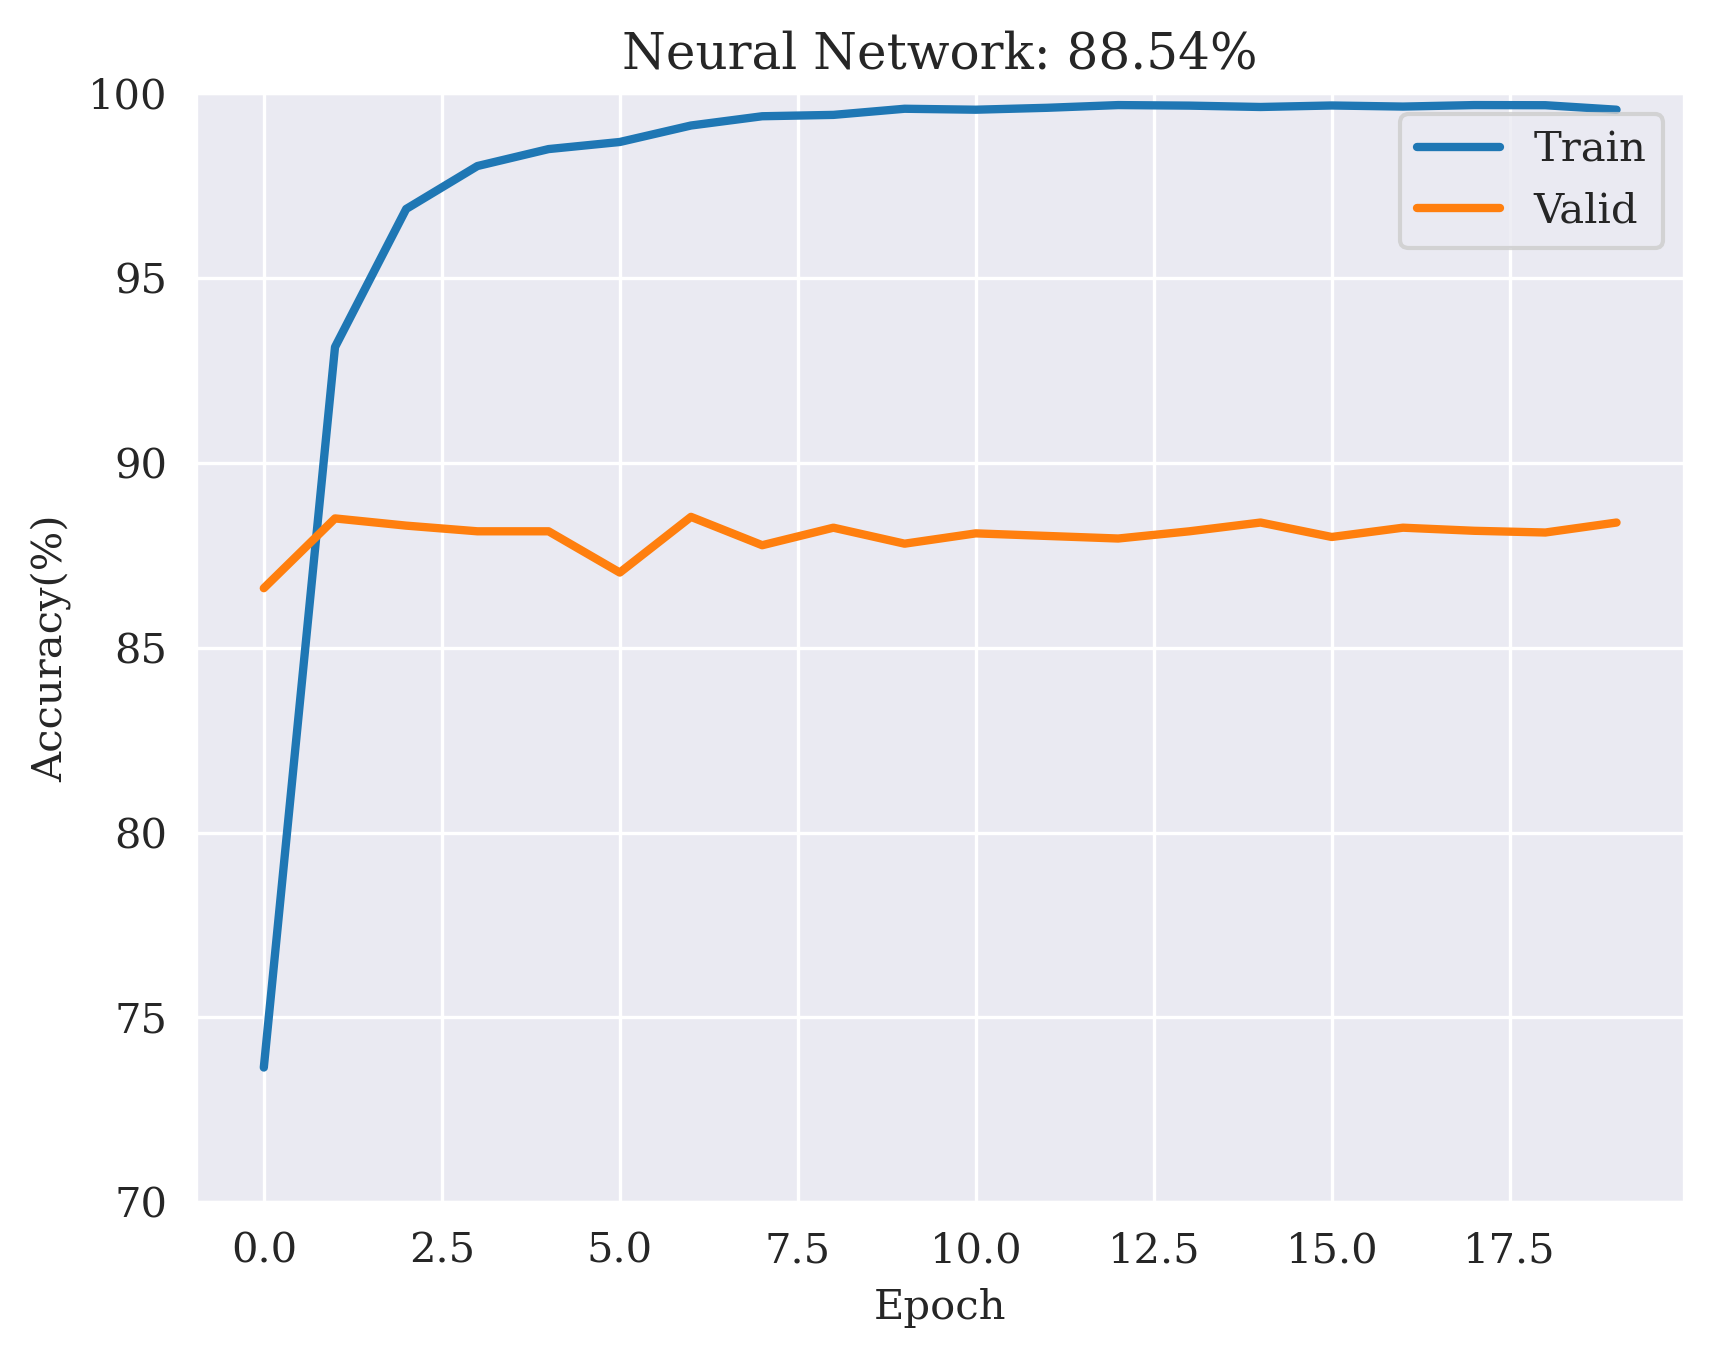

In [165]:
plt.rcParams['font.family']='serif'
plt.figure(dpi=300)
plt.title(f'Neural Network: {max(valid_acc_list):.2f}%')
plt.plot(range(len(train_acc_list)),train_acc_list,label='Train',lw=2)
plt.plot(range(len(valid_acc_list)),valid_acc_list,label='Valid',lw=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy(%)')
plt.ylim(70,100)
plt.legend()
plt.savefig('Acc.jpg')

In [166]:
# neural network
length=x_train_num.todense().shape[0]
length1=x_test_num.todense().shape[0]
model5.to('cpu')
y_train_pred5=[]
y_pred5=[]
#手动实现批次的处理
batch=1024
with torch.no_grad():
    print('Train data:')
    for i in tqdm(range(int(length/batch)+1)):
        feature=torch.FloatTensor(x_train_num.todense()[i*batch:(i+1)*batch])
        pred=model5(feature)
        y_train_pred5+=pred.argmax(dim=1).detach().numpy().tolist()

    print('Test data:')
    for i in tqdm(range(int(length1/batch)+1)):
        feature=torch.FloatTensor(x_test_num.todense()[i*batch:(i+1)*batch])
        pred=model5(feature)
        y_pred5+=pred.argmax(dim=1).detach().numpy().tolist()

Train data:


100%|██████████| 27/27 [00:05<00:00,  5.33it/s]


Test data:


100%|██████████| 7/7 [00:00<00:00, 15.10it/s]


In [167]:
'''
model stacking
'''
train_meta_data=pd.DataFrame({'LogisticRegression':y_train_pred1,
              'SVC':y_train_pred2,
              'RandomForest':y_train_pred3,
              'DecisionTree':y_train_pred4,
              'Neural Network':y_train_pred5})
test_meta_data=pd.DataFrame({'LogisticRegression':y_pred1,
              'SVC':y_pred2,
              'RandomForest':y_pred3,
              'DecisionTree':y_pred4,
              'Neural Network':y_pred5})
Meta_model=RandomForestClassifier(n_estimators=50,random_state=80)
Meta_model.fit(train_meta_data,y_train)
Meta_pred=Meta_model.predict(test_meta_data)
accuracy = accuracy_score(y_test, Meta_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test,Meta_pred))

Accuracy: 0.8902694610778443
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1929
           1       0.88      0.85      0.86      1283
           2       0.93      0.92      0.92      3468

    accuracy                           0.89      6680
   macro avg       0.88      0.88      0.88      6680
weighted avg       0.89      0.89      0.89      6680



In [168]:
def predict_Meta_review_sentiment(review):
    review_num=model_tfidf.transform([review])
    feature=np.array(review_num.todense())
    pred1=model1.predict(feature)
    pred2=model2.predict(feature)
    pred3=model3.predict(feature)
    pred4=model4.predict(feature)
    feature=torch.FloatTensor(np.array(review_num.todense()))
    pred5=model5(feature).argmax(dim=1).detach().numpy().tolist()
    input_meta=np.array([pred1,pred2,pred3,pred4,pred5]).reshape(1,-1)
    result=Meta_model.predict(input_meta)[0]
    labels=['Negative','Neutral','Positive']
    print(f'{review}\t:\t{labels[result]}')


predict_Meta_review_sentiment('it is good.')
predict_Meta_review_sentiment('Bad environment, really a bad experience.')

it is good.	:	Positive
Bad environment, really a bad experience.	:	Negative


In [169]:
# 绘制混淆矩阵
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    - cm : 计算出的混淆矩阵的值
    - classes : 混淆矩阵中每一行每一列对应的列
    - normalize : True:显示百分比, False:显示个数
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("显示百分比：")
        np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
        print(cm)
    else:
        print('显示具体数字：')
        print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    # matplotlib版本问题，如果不加下面这行代码，则绘制的混淆矩阵上下只能显示一半，有的版本的matplotlib不需要下面的代码，分别试一下即可
    plt.ylim(len(classes) - 0.5, -0.5)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

显示百分比：
[[ 0.84  0.06  0.10]
 [ 0.11  0.83  0.06]
 [ 0.07  0.02  0.91]]


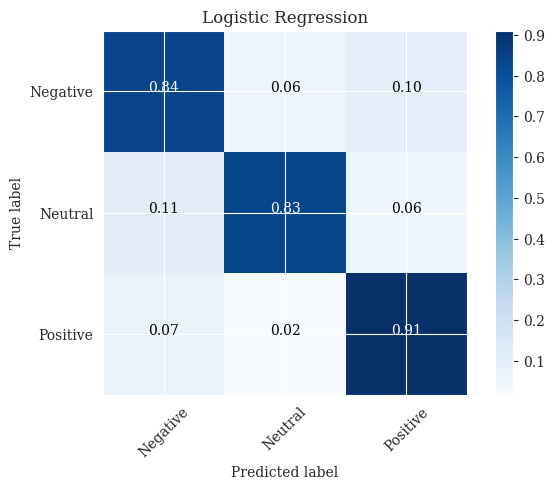

In [170]:
#LogisticRegression
cm1=confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm=cm1,
                      classes=['Negative','Neutral','Positive'],
                      normalize=True,
                      title='Logistic Regression')

显示百分比：
[[ 0.86  0.04  0.09]
 [ 0.15  0.80  0.05]
 [ 0.08  0.01  0.91]]


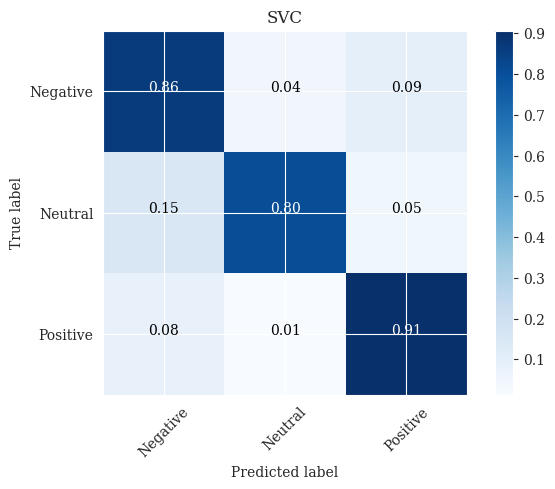

In [171]:
cm=confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(cm=cm,
                      classes=['Negative','Neutral','Positive'],
                      normalize=True,
                      title='SVC')

显示百分比：
[[ 0.84  0.06  0.09]
 [ 0.06  0.89  0.06]
 [ 0.06  0.02  0.92]]


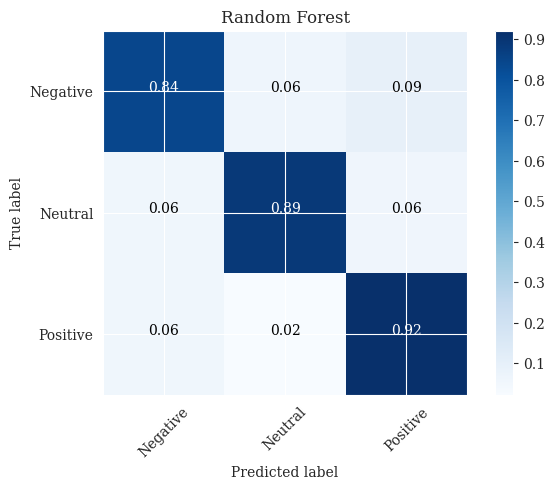

In [172]:
cm=confusion_matrix(y_test, y_pred3)
plot_confusion_matrix(cm=cm,
                      classes=['Negative','Neutral','Positive'],
                      normalize=True,
                      title='Random Forest')

显示百分比：
[[ 0.67  0.20  0.12]
 [ 0.03  0.93  0.03]
 [ 0.06  0.09  0.85]]


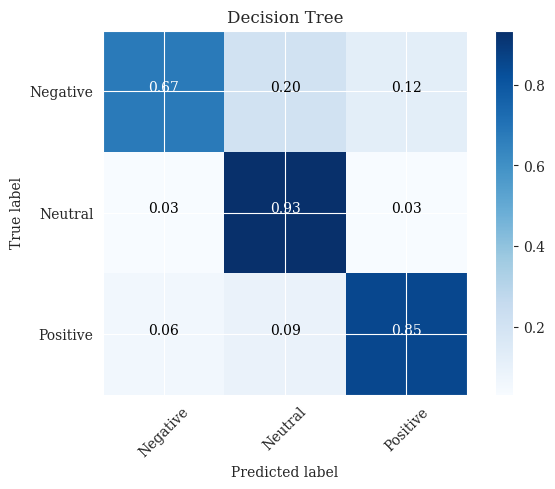

In [173]:
cm=confusion_matrix(y_test, y_pred4)
plot_confusion_matrix(cm=cm,
                      classes=['Negative','Neutral','Positive'],
                      normalize=True,
                      title='Decision Tree')

显示百分比：
[[ 0.84  0.05  0.11]
 [ 0.08  0.84  0.08]
 [ 0.06  0.02  0.93]]


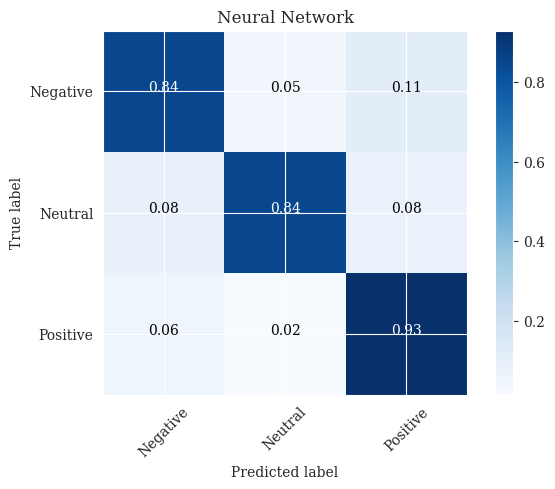

In [174]:
cm=confusion_matrix(y_test, y_pred5)
plot_confusion_matrix(cm=cm,
                      classes=['Negative','Neutral','Positive'],
                      normalize=True,
                      title='Neural Network')

显示百分比：
[[ 0.87  0.04  0.09]
 [ 0.10  0.85  0.06]
 [ 0.06  0.02  0.92]]


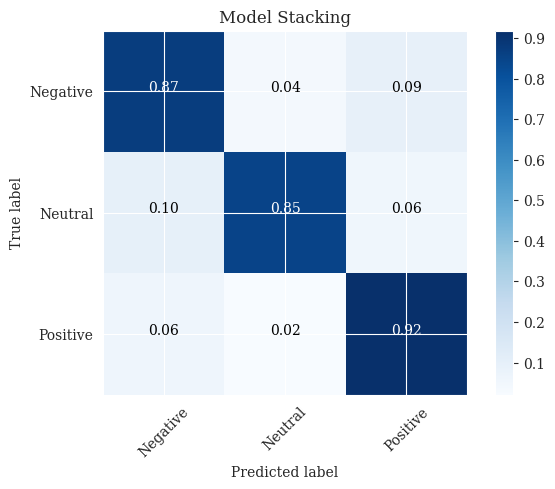

In [175]:
cm=confusion_matrix(y_test, Meta_pred)
plot_confusion_matrix(cm=cm,
                      classes=['Negative','Neutral','Positive'],
                      normalize=True,
                      title='Model Stacking')